Object X Detection using feature matching

In [44]:
# Author - Puneet Soni
# Object X detection using feature matching

#Feature Matching - Brute Force matching using orb descriptors.

import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import time

In [45]:
start_time = time.perf_counter()
# speed-up using multithreads

cv2.setUseOptimized(True);
cv2.setNumThreads(8);

In [46]:
# Image Data Set Path

#dataset_path = '../image_data_set/'


# Read the query image and input image files

img1 =  cv2.imread('image_data_set/sample_test_image_query_1.png',0) # Query Image to test with
img2 =  cv2.imread('image_data_set/sample_test_image_1.png',0) # Train Image to test on with Query Image

#img3 =  cv2.imread('image_data_set/sample_test_image_query_2.jpg',0)
#img4 =  cv2.imread('image_data_set/sample_test_image_2.jpg',0)

#img5 =  cv2.imread('image_data_set/sample_test_image_query_3.jpg',0)
#img6 =  cv2.imread('image_data_set/sample_test_image_3.jpg',0)

#img7 =  cv2.imread('image_data_set/sample_test_image_query_4.jpg',0)
#img8 =  cv2.imread('image_data_set/sample_test_image_4.jpg',0)

#img9 =  cv2.imread('image_data_set/sample_test_image_query_5.jpg',0)
#img10 =  cv2.imread('image_data_set/sample_test_image_5.jpg',0)

#plt.imshow(img3)
#plt.show()

#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

2. Displaying the query image and train image.

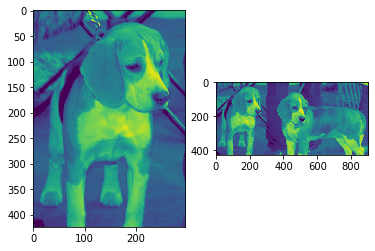

In [47]:
# Display the query and train images
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img1)
f.add_subplot(1,2, 2)
plt.imshow(img2)
plt.show(block=True)

In [48]:
# Defining Similarity Detector

orb  = cv2.ORB_create()

# Key Points and Descriptors

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

kp3, des3 = orb.detectAndCompute(img3,None)
kp4, des4 = orb.detectAndCompute(img4,None)
  
kp5, des5 = orb.detectAndCompute(img5,None)
kp6, des6 = orb.detectAndCompute(img6,None)
  
kp7, des7 = orb.detectAndCompute(img7,None)
kp8, des8 = orb.detectAndCompute(img8,None)
  
kp9, des9 = orb.detectAndCompute(img9,None)
kp10, des10 = orb.detectAndCompute(img10,None)

# Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# BFMatcher objects
matches = bf.match(des1,des2)
matches = bf.match(des3,des4)
matches = bf.match(des5,des6)
matches = bf.match(des7,des8)
matches = bf.match(des9,des10)

matches = sorted(matches, key = lambda x:x.distance)


In [49]:
# Create a new varible for img3 which contains the matching features of img1 and img2

img_output_1 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:200],None, flags=2)

img_output_2 = cv2.drawMatches(img3,kp3,img4,kp4,matches[:30],None, flags=2)

img_output_3 = cv2.drawMatches(img5,kp5,img6,kp6,matches[:30],None, flags=2)

img_output_4 = cv2.drawMatches(img7,kp7,img8,kp8,matches[:30],None, flags=2)

img_output_5 = cv2.drawMatches(img9,kp9,img10,kp10,matches[:30],None, flags=2)

#img3 = cv2.drawKeypoints(img1,kp1,img2,kp2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.


In [50]:
# Define how similar they are
number_keypoints = 0
if len(kp1) <= len(kp2):
    number_keypoints = len(kp1)
else:
    number_keypoints = len(kp2)
print("Keypoints 1ST Image: " + str(len(kp1)))
print("Keypoints 2ND Image: " + str(len(kp2)))

Keypoints 1ST Image: 468
Keypoints 2ND Image: 500


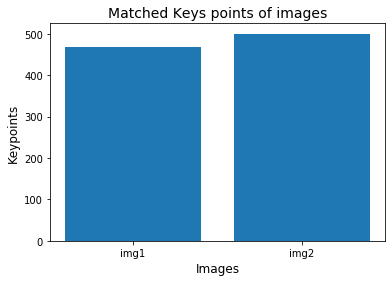

In [51]:
image_array = ['img1','img2']
keypoints_array = [len(kp1),len(kp2)]

plt.bar(image_array, keypoints_array)
plt.title('Matched Keys points of images', fontsize=14)
plt.xlabel('Images', fontsize='large')
plt.xticks()
plt.ylabel('Keypoints', fontsize='large')

plt.show()

In [52]:
#print("GOOD Matches:", len(good_points))
#print("How good it's the match: ", len(good_points) / number_keypoints * 100, "%")

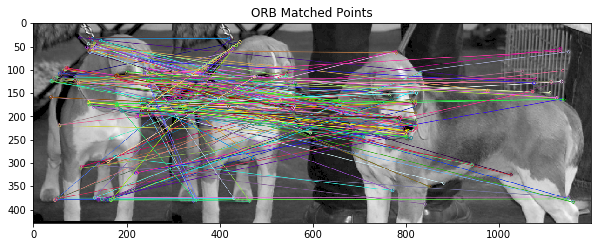

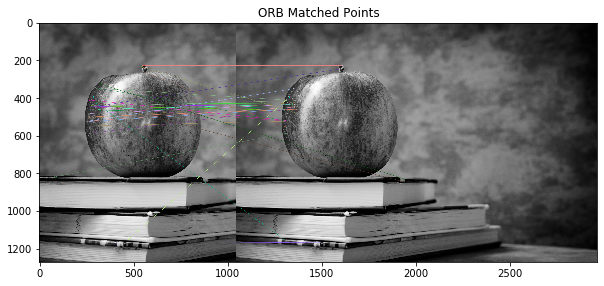

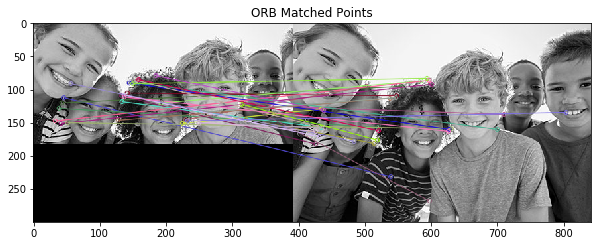

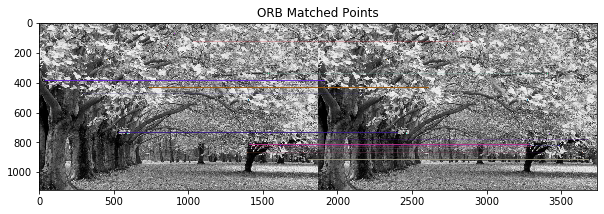

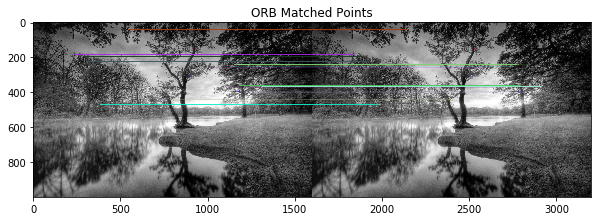

In [53]:
# Display the new image
plt.figure(figsize=(10, 10))
plt.title('ORB Matched Points')

plt.imshow(img_output_1)
plt.show()
cv2.imwrite('matching_results/IMAGE_ORB_OUTPUT_1.png',img_output_1)

plt.figure(figsize=(10, 10))
plt.title('ORB Matched Points')

plt.imshow(img_output_2)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('ORB Matched Points')

plt.imshow(img_output_3)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('ORB Matched Points')

plt.imshow(img_output_4)
plt.show()

plt.figure(figsize=(10, 10))
plt.title('ORB Matched Points')

plt.imshow(img_output_5)
plt.show()

In [54]:
Total_Execution_Time = time.perf_counter() - start_time
print(Total_Execution_Time, "seconds")

4.042982800000118 seconds
